In [1]:
%%capture 

# Important libraries header information
# ----------------------------------

# change this directory as necessary
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re
import time

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
def plotrotorlines(zhh, rotorD, xstart, xend, **kwargs):
    plt.hlines(zhh,             xstart, xend, linewidth=1.0, **kwargs) # Plot the HH line
    plt.hlines(zhh+rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line
    plt.hlines(zhh-rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line   

In [3]:
 # Set your run directory here
rundir   ='/lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI'
rundir2  ='/lustre/orion/cfd162/proj-shared/lcheung/ALCC_Frontier_WindFarm/precursor/'
caselist = [ 
            {'rundir':rundir2+'/HighWS_LowTI_10kmX10km/', 'tag':'HighWS/LowTI 10x10',
             'inputfile':'Offshore_HighWS_LowTI_Precursor_10kmX10km.inp',
             'ncfile':'post_processing/abl_statistics129000.nc', 'avgtimes':[30000, 35000],
             'mstyle':{'mfc':'r', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'r', 'ls':':'}},    

            {'rundir':rundir+'/precursor6_4kmX4km_5m', 'tag':'MedWS/LowTI 4x4',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':':'}},
            {'rundir':rundir+'/precursor6_20kmX20km_5m/', 'tag':'MedWS/LowTI 20x20',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics100000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'^', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':':'}},
            {'rundir':rundir2+'/LowWS_LowTI_10kmX10km/', 'tag':'LowWS/LowTI 10x10',
             'inputfile':'Offshore_LowWS_LowTI_Precursor_10kmX10km.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'g', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'g', 'ls':':'}},
            {'rundir':rundir2+'/LowWS_LowTI_20kmX20km/', 'tag':'LowWS/LowTI 20x20',
             'inputfile':'Offshore_LowWS_LowTI_Precursor_10kmX10km.inp',
             'ncfile':'post_processing/abl_statistics40000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'g', 'marker':'^', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'g', 'ls':':'}},
            {'rundir':rundir2+'/MedWS_HighTI_10kmX10km/', 'tag':'MedWS/HighTI 10x10',
             'inputfile':'Offshore_MedWS_HighTI_Precursor_10kmX10km.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'c', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'c', 'ls':':'}},    
            {'rundir':rundir2+'/MedWS_HighTI_20kmX20km/', 'tag':'MedWS/HighTI 20x20',
             'inputfile':'Offshore_MedWS_HighTI_Precursor_20kmX20km.inp',
             'ncfile':'post_processing/abl_statistics52000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'c', 'marker':'^', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'c', 'ls':':'}},    
            {'rundir':rundir2+'/MedWS_MedTI_10kmX10km/', 'tag':'MedWS/MedTI 10x10',
             'inputfile':'Offshore_MedWS_MedTI_Precursor_10kmX10km.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'b', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'b', 'ls':':'}},    
    
]

# Average between 15,000 sec to 20,000 sec
avgtimes = [25000, 30000]

# Hub-height locations
plotheights=[30, 150, 270]

zHH_target    = 150.0
rotorD        = 240
bottom_tip    = zHH_target - 0.5*rotorD
top_tip       = zHH_target + 0.5*rotorD

# Load the entire netcdf in memory
loadinmemory = False   # Do this only if there's enough RAM and for new (python 3+ netCDF4) libraries

In [4]:
for case in caselist:
    case['App'] = amrwind.MyApp.init_nogui()
    tstart = time.time()
    case['App'].ABLpostpro_loadnetcdffile(case['rundir']+'/'+case['ncfile'], usemmap=loadinmemory)
    tend   = time.time()
    print("Load time: %f sec"%(tend-tstart))

Loading /lustre/orion/cfd162/proj-shared/lcheung/ALCC_Frontier_WindFarm/precursor//HighWS_LowTI_10kmX10km//post_processing/abl_statistics129000.nc
Time range: 32252.500000 to 35000.000000
Done.
Load time: 0.490226 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor6_4kmX4km_5m/post_processing/abl_statistics00000.nc
Time range: 0.800000 to 30000.000000
Done.
Load time: 15.597564 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor6_20kmX20km_5m//post_processing/abl_statistics100000.nc
Time range: 25004.000000 to 30000.000000
Done.
Load time: 0.550835 sec
Loading /lustre/orion/cfd162/proj-shared/lcheung/ALCC_Frontier_WindFarm/precursor//LowWS_LowTI_10kmX10km//post_processing/abl_statistics00000.nc
Time range: 5.000000 to 30000.000000
Done.
Load time: 2.470100 sec
Loading /lustre/orion/cfd162/proj-shared/lcheung/ALCC_Frontier_WindFarm/precursor//LowWS_LowTI_20kmX20km//post_processing/abl_statistics40000.nc


In [5]:
# First, let's look at the averaged statistics
for case in caselist:
    print("***** "+case['tag']+" *******")
    tstart = time.time()
    case['reportstats'] = case['App'].ABLpostpro_printreport(avgt=case['avgtimes'], avgz=plotheights,span=(bottom_tip,top_tip))
    tend   = time.time()
    print("Compute time: %f sec"%(tend-tstart))

***** HighWS/LowTI 10x10 *******
Loading u
Loading u'u'_r
Loading v'v'_r
Loading v
Loading w'w'_r
Loading theta
Loading w'theta'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha    Alpha-Fit     ObukhovL         Veer     Veer-Fit 
      ===         ====         ====         ====         ====         ====         ====         ====         ====         ==== 
    30.00 8.968800e+00 2.205210e+02 4.648577e-02 7.554129e-02 1.291648e-01 1.734928e-01 2.793107e+02 4.529550e-02 4.134151e-02 
   150.00 1.149996e+01 2.250010e+02 2.616933e-02 4.088599e-02 1.889263e-01 1.734928e-01 4.510918e+02 4.208418e-02 4.134151e-02 
   270.00 1.287115e+01 2.305070e+02 1.696970e-02 2.666057e-02 1.721217e-01 1.734928e-01 1.025145e+03 4.828126e-02 4.134151e-02 

ustar: 0.266677
Compute time: 3.575086 sec
***** MedWS/LowTI 4x4 *******
Loading u
Loading u'u'_r
Loading v'v'_r
Loading v
Loading w'w'_r
Loading theta
Loading w'theta'_r
        z       Uhoriz      WindDir       TI_TKE     TI_h

In [6]:
# Let's compute the shear based on z=10m and z=169m
print("%20s %10s %10s %10s"%("CASE", "30-150", "30-270", "150-270"))
for case in caselist:
    U30  = case['reportstats']['Uhoriz'][0]
    U150  = case['reportstats']['Uhoriz'][1]
    U270  = case['reportstats']['Uhoriz'][2]
    case['alpha_30_150'] = alpha_30_150  = np.log(U30/U150)/np.log(30.0/150.0)
    case['alpha_30_270']  = alpha_30_270  = np.log(U30/U270)/np.log(30.0/270.0)
    case['alpha_150_270'] = alpha_150_270  = np.log(U150/U270)/np.log(150.0/270.0)
    #print("%s alpha_10_169 = %f"%(case['tag'], alpha_60_91))
    print("%20s % 10f % 10f % 10f"%(case['tag'], alpha_30_150, alpha_30_270, alpha_150_270))

                CASE     30-150     30-270    150-270
  HighWS/LowTI 10x10   0.154459   0.164406   0.191642
     MedWS/LowTI 4x4   0.164197   0.166849   0.174110
   MedWS/LowTI 20x20   0.166741   0.169065   0.175431
   LowWS/LowTI 10x10   0.156374   0.141193   0.099625
   LowWS/LowTI 20x20   0.154215   0.141633   0.107184
  MedWS/HighTI 10x10   0.077438   0.066755   0.037504
  MedWS/HighTI 20x20   0.077507   0.067968   0.041850
   MedWS/MedTI 10x10   0.087268   0.080504   0.061983


In [7]:
# These values came from Mithu's post-processed ARM data - Stable
ARM_alpha = 0.171
ARM_TI    = 0.037
ARM_WS    = 9.03
ARM_zHH   = 150.0

DNVlidar = [
            {'label':'DNV Low WS/Low TI',  'alpha':0.142, 'TI':0.0363,  'WS':6.52,  'zHH':150, 'mstyle':{'mfc':'g', 'marker':'*', 'lw':0, 'mec':'g',}, 'lstyle':{'color':'g', 'ls':':'}},
            {'label':'DNV Med WS/Low TI',  'alpha':0.171, 'TI':0.037,   'WS':9.05,  'zHH':150, 'mstyle':{'mfc':'y', 'marker':'*', 'lw':0, 'mec':'y',}, 'lstyle':{'color':'y', 'ls':':'}},
            {'label':'DNV Med WS/Med TI',  'alpha':0.0655, 'TI':0.070, 'WS':9.03,  'zHH':150, 'mstyle':{'mfc':'b', 'marker':'*', 'lw':0, 'mec':'b',}, 'lstyle':{'color':'b', 'ls':':'}},
            {'label':'DNV Med WS/High TI', 'alpha':0.0566, 'TI':0.109, 'WS':8.93,  'zHH':150, 'mstyle':{'mfc':'c', 'marker':'*', 'lw':0, 'mec':'c',}, 'lstyle':{'color':'c', 'ls':':'}},
            {'label':'DNV High WS/Low TI', 'alpha':0.156, 'TI':0.0348, 'WS':11.58, 'zHH':150, 'mstyle':{'mfc':'r', 'marker':'*', 'lw':0, 'mec':'r',}, 'lstyle':{'color':'r', 'ls':':'}},
            
           ]

HighWS/LowTI 10x10 0.04088599131173245
MedWS/LowTI 4x4 0.038429681142724936
MedWS/LowTI 20x20 0.03842920047120357
LowWS/LowTI 10x10 0.03637758728504707
LowWS/LowTI 20x20 0.03727492994300093
MedWS/HighTI 10x10 0.13165224091053307
MedWS/HighTI 20x20 0.13571676709713681
MedWS/MedTI 10x10 0.07765931341869783


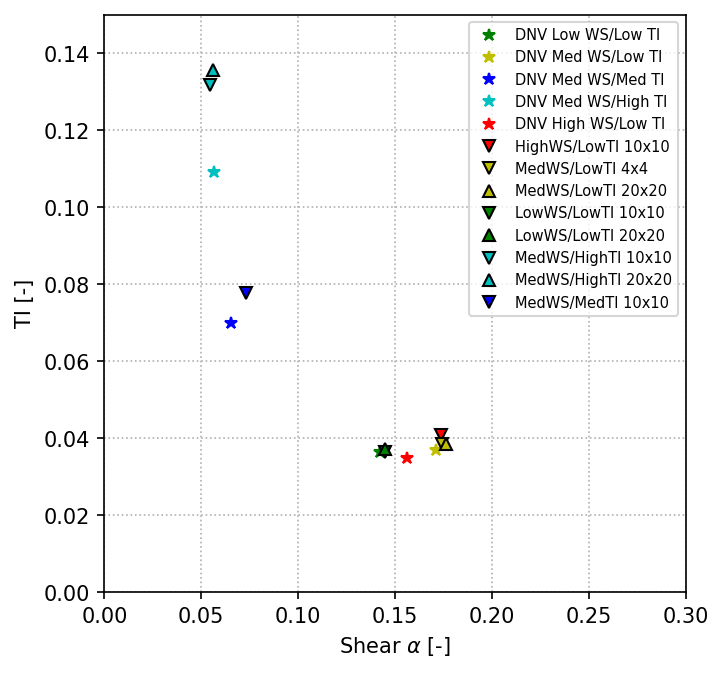

In [8]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)

# Plot the ARM data
for lidar in DNVlidar:
    plt.plot(lidar['alpha'], lidar['TI'], **lidar['mstyle'], label=lidar['label'])
#plt.plot(ARM_alpha, ARM_TI, 'r*', label='Target')

# Plot the AMR-Wind results
for case in caselist:
    mstyle=case['mstyle']
    print(case['tag'], case['reportstats']['TI_horiz'][1])
    plt.plot(case['reportstats']['Alpha-Fit'][2], case['reportstats']['TI_horiz'][1],  label=case['tag'],**mstyle)

#plt.xlim([0.25, 0.45])
plt.xlim([0.0, 0.30])
plt.ylim([0, 0.15])
plt.xlabel(r'Shear $\alpha$ [-]')
plt.ylabel('TI [-]')
plt.grid(ls=':')
plt.legend(prop={'size':7})